In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler

# Patent Data

In [2]:
#import the data into the file
data = pd.read_csv('uspto.patent.appl-date.grant-date.txt',
                   names = ["ID","Grant-date","Appli-date","CPC"],sep='\t', 
                   dtype = {"CPC":str},header = None)
#remove the duplicated rows and now data with distinct patent ID
data.drop_duplicates(['ID'], keep = 'first', inplace = True)
data

C:\Users\Delia\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Grant-date,Appli-date,CPC
0,3931488,1976-01-06,1950-06-20,F42C 19/06 (20130101)+H01H 27/00 (20130101)+H0...
1,3931515,1976-01-06,1964-09-24,G01S 3/786 (20130101)
2,3931065,1976-01-06,1967-02-13,C08J 9/00 (20130101)+C08J 9/14 (20130101)+Y10S...
3,3931126,1976-01-06,1967-10-04,C08C 19/26 (20130101)+C08C 19/22 (20130101)
4,3931268,1976-01-06,1970-05-06,C07C 233/00 (20130101)+C07C 243/38 (20130101)+...
...,...,...,...,...
12988318,20190308874,2019-10-10,2016-10-27,B81C 2203/0792 20130101+B81B 7/007 20130101+B8...
12988319,20190308693,2019-10-10,2017-01-17,B63B 9/08 20130101+G01S 13/9307 20130101+G01B ...
12988320,20190307304,2019-10-10,2017-07-07,A47L 9/322 20130101+A47L 9/1608 20130101+A47L ...
12988321,20190309663,2019-10-10,2017-10-24,F01L 13/0015 20130101+F01L 1/18 20130101+F01L ...


In [3]:
Inventor = pd.read_csv('patent_Inventor.txt',names = ["ID","Name"],sep='\t', header = 0)
Inventors = Inventor.groupby(['ID']).count().reset_index()
result = pd.merge(data, Inventors[['ID','Name']],
                 on='ID', how='left')
result = result.rename(columns={"Name":"Inventor"})
result

,ID,Grant-date,Appli-date,CPC,Inventor
0,3931488,1976-01-06,1950-06-20,F42C 19/06 (20130101)+H01H 27/00 (20130101)+H0...,1.0
1,3931515,1976-01-06,1964-09-24,G01S 3/786 (20130101),1.0
2,3931065,1976-01-06,1967-02-13,C08J 9/00 (20130101)+C08J 9/14 (20130101)+Y10S...,2.0
3,3931126,1976-01-06,1967-10-04,C08C 19/26 (20130101)+C08C 19/22 (20130101),1.0
4,3931268,1976-01-06,1970-05-06,C07C 233/00 (20130101)+C07C 243/38 (20130101)+...,7.0
...,...,...,...,...,...
12964360,20190308874,2019-10-10,2016-10-27,B81C 2203/0792 20130101+B81B 7/007 20130101+B8...,3.0
12964361,20190308693,2019-10-10,2017-01-17,B63B 9/08 20130101+G01S 13/9307 20130101+G01B ...,1.0
12964362,20190307304,2019-10-10,2017-07-07,A47L 9/322 20130101+A47L 9/1608 20130101+A47L ...,3.0
12964363,20190309663,2019-10-10,2017-10-24,F01L 13/0015 20130101+F01L 1/18 20130101+F01L ...,6.0


# C12N 15/907 Subclass

In [4]:
#filtered the data using our chosen CPC
df = result[result["CPC"].str.contains("C12N 15/907", na=False)]
df

,ID,Grant-date,Appli-date,CPC,Inventor
1092946,4950599,1990-08-21,1987-01-29,A61K 47/48776 (20130101)+C12N 15/86 (20130101)...,1.0
1102751,4959317,1990-09-25,1987-04-29,C12N 15/00 (20130101)+C12N 15/907 (20130101)+C...,1.0
1448629,5272071,1993-12-21,1992-05-28,C12N 15/67 (20130101)+C12N 15/907 (20130101)+C...,1.0
1627553,5434065,1995-07-18,1993-05-06,C07K 14/255 (20130101)+C12Q 1/6897 (20130101)+...,3.0
1661589,5464764,1995-11-07,1993-02-04,C07K 14/47 (20130101)+C07K 14/50 (20130101)+C1...,2.0
...,...,...,...,...,...
12952430,20190300861,2019-10-03,2017-07-07,C12N 2510/04 20130101+C12N 9/002 20130101+G01N...,5.0
12952977,20190300911,2019-10-03,2017-11-01,C12N 15/905 20130101+C12N 2800/00 20130101+C12...,3.0
12957865,20190309259,2019-10-10,2016-05-09,C12N 2510/00 20130101+C12N 5/0606 20130101+C12...,4.0
12960375,20190309288,2019-10-10,2017-08-18,C12N 15/1058 20130101+C12N 9/22 20130101+C12Y ...,2.0


In [5]:
#create Year-month variable
df['year'] = pd.DatetimeIndex(df['Appli-date']).year
df['month'] = pd.DatetimeIndex(df['Appli-date']).month
df['month_year'] = pd.to_datetime(df['Appli-date']).dt.to_period('M')
df['Qt'] = pd.to_datetime(df['Appli-date']).dt.quarter
df

C:\Users\Delia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Delia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Delia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,ID,Grant-date,Appli-date,CPC,Inventor,year,month,month_year,Qt
1092946,4950599,1990-08-21,1987-01-29,A61K 47/48776 (20130101)+C12N 15/86 (20130101)...,1.0,1987,1,1987-01,1
1102751,4959317,1990-09-25,1987-04-29,C12N 15/00 (20130101)+C12N 15/907 (20130101)+C...,1.0,1987,4,1987-04,2
1448629,5272071,1993-12-21,1992-05-28,C12N 15/67 (20130101)+C12N 15/907 (20130101)+C...,1.0,1992,5,1992-05,2
1627553,5434065,1995-07-18,1993-05-06,C07K 14/255 (20130101)+C12Q 1/6897 (20130101)+...,3.0,1993,5,1993-05,2
1661589,5464764,1995-11-07,1993-02-04,C07K 14/47 (20130101)+C07K 14/50 (20130101)+C1...,2.0,1993,2,1993-02,1
...,...,...,...,...,...,...,...,...,...
12952430,20190300861,2019-10-03,2017-07-07,C12N 2510/04 20130101+C12N 9/002 20130101+G01N...,5.0,2017,7,2017-07,3
12952977,20190300911,2019-10-03,2017-11-01,C12N 15/905 20130101+C12N 2800/00 20130101+C12...,3.0,2017,11,2017-11,4
12957865,20190309259,2019-10-10,2016-05-09,C12N 2510/00 20130101+C12N 5/0606 20130101+C12...,4.0,2016,5,2016-05,2
12960375,20190309288,2019-10-10,2017-08-18,C12N 15/1058 20130101+C12N 9/22 20130101+C12Y ...,2.0,2017,8,2017-08,3


# Monthly Data file

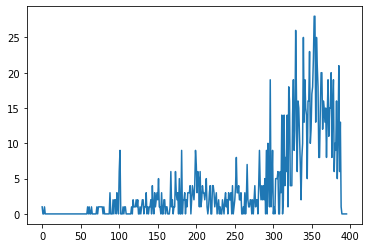

In [6]:
## genearate monthly Data
Mdf = df.groupby(['year','month'])
patent_count = Mdf.size()
l = np.zeros(396, dtype=int)
idx = 0
k = 0
size = patent_count.size
#patent_count.index[idx][0] will get the year of idx row
#patent_count.index[idx][1] will get the month of idx row
while idx < size:
    y = patent_count.index[idx][0]
    m = patent_count.index[idx][1]
    k = (y-1987)*12+m-1
    l[k]=patent_count.values[idx]
    idx = idx +1
plt.plot(l)
#np.savetxt("Monthly patent_count.csv", l, header = "number")

In [7]:
pt = pd.date_range(start='1/1/1987',periods = 396, freq='M')
pt_Y = pd.DatetimeIndex(pt).year
pt_M = pd.DatetimeIndex(pt).month
pt_Y
# create monthly data file
M = pd.DataFrame(data = {'year':pt_Y,'month':pt_M,'date':pt,'counts':l})
M

,year,month,date,counts
0,1987,1,1987-01-31,1
1,1987,2,1987-02-28,0
2,1987,3,1987-03-31,0
3,1987,4,1987-04-30,1
4,1987,5,1987-05-31,0
...,...,...,...,...
391,2019,8,2019-08-31,0
392,2019,9,2019-09-30,0
393,2019,10,2019-10-31,0
394,2019,11,2019-11-30,0


In [8]:
C = Mdf.sum().reset_index()
M = pd.merge(M, C[['year','month','Inventor']],
                on=['year','month'], how='left')

# Citation data

In [9]:
Citation = pd.read_csv('patent.date.citing.C12N_15_907.txt',sep='\t', header = 0)
Citation

,patent,grantdate,patent_holder
0,10000555,2018-06-19,"Seattle Genetics, Inc."
1,10000772,2018-06-19,The Regents of the University of California
2,10000781,2018-06-19,The Penn State Research Foundation
3,10004211,2018-06-26,"REGENERON PHARMACEUTICALS, INC."
4,10004765,2018-06-26,University of Massachusetts
...,...,...,...
3889,RE39220,2006-08-01,"Genetic Applications, LLC"
3890,RE43586,2012-08-14,Sloan-Kettering Institute for Cancer Research
3891,RE45847,2016-01-19,Pfizer Inc.
3892,RE47123,2018-11-13,SANOFI


In [10]:
Citation['year'] = pd.DatetimeIndex(Citation['grantdate']).year
Citation['month'] = pd.DatetimeIndex(Citation['grantdate']).month
Citation

,patent,grantdate,patent_holder,year,month
0,10000555,2018-06-19,"Seattle Genetics, Inc.",2018,6
1,10000772,2018-06-19,The Regents of the University of California,2018,6
2,10000781,2018-06-19,The Penn State Research Foundation,2018,6
3,10004211,2018-06-26,"REGENERON PHARMACEUTICALS, INC.",2018,6
4,10004765,2018-06-26,University of Massachusetts,2018,6
...,...,...,...,...,...
3889,RE39220,2006-08-01,"Genetic Applications, LLC",2006,8
3890,RE43586,2012-08-14,Sloan-Kettering Institute for Cancer Research,2012,8
3891,RE45847,2016-01-19,Pfizer Inc.,2016,1
3892,RE47123,2018-11-13,SANOFI,2018,11


In [11]:
C = Citation.groupby(['year','month']).size().reset_index()
C = C.rename(columns = {0:"Citation"})
M = pd.merge(M, C[['year','month','Citation']],
                on=['year','month'], how='left')
M =M.fillna(0)
M = M.drop(columns=['year','month'])
M

,date,counts,Inventor,Citation
0,1987-01-31,1,1.0,0.0
1,1987-02-28,0,0.0,1.0
2,1987-03-31,0,0.0,0.0
3,1987-04-30,1,1.0,0.0
4,1987-05-31,0,0.0,0.0
...,...,...,...,...
391,2019-08-31,0,0.0,43.0
392,2019-09-30,0,0.0,47.0
393,2019-10-31,0,0.0,34.0
394,2019-11-30,0,0.0,0.0


# Quarterly Data File

In [12]:
Q = M.resample('Q', on = 'date').sum()
Q = Q.reset_index()
Q

,date,counts,Inventor,Citation
0,1987-03-31,1,1.0,1.0
1,1987-06-30,1,1.0,0.0
2,1987-09-30,0,0.0,0.0
3,1987-12-31,0,0.0,0.0
4,1988-03-31,0,0.0,0.0
...,...,...,...,...
127,2018-12-31,30,121.0,106.0
128,2019-03-31,38,144.0,101.0
129,2019-06-30,14,51.0,117.0
130,2019-09-30,0,0.0,143.0


# Half Yearly Data File

In [13]:
H = M.resample('6M', how='sum', closed='left', loffset='-1M', on ='date').reset_index()
H

C:\Users\Delia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


,date,counts,Inventor,Citation
0,1987-06-30,2,2.0,1.0
1,1987-12-31,0,0.0,0.0
2,1988-06-30,0,0.0,0.0
3,1988-12-31,0,0.0,0.0
4,1989-06-30,0,0.0,0.0
...,...,...,...,...
61,2017-12-31,84,298.0,197.0
62,2018-06-30,84,317.0,229.0
63,2018-12-31,65,261.0,220.0
64,2019-06-30,52,195.0,218.0


# Yearly Data File

In [14]:
Y = M.resample('A', on = 'date').sum().reset_index()
Y

,date,counts,Inventor,Citation
0,1987-12-31,2,2.0,1.0
1,1988-12-31,0,0.0,0.0
2,1989-12-31,0,0.0,0.0
3,1990-12-31,0,0.0,0.0
4,1991-12-31,1,2.0,0.0
5,1992-12-31,3,5.0,0.0
6,1993-12-31,7,17.0,1.0
7,1994-12-31,9,20.0,1.0
8,1995-12-31,21,51.0,3.0
9,1996-12-31,5,10.0,2.0


In [15]:
M.to_csv('Monthly data.csv')
Q.to_csv('Quarterly data.csv')
H.to_csv('Half Yearly data.csv')
Y.to_csv('Yearly data.csv')

# RNN model

In [16]:
# start with the quarterly data
#Qd = Q[0:128]
Qd = Q.drop(columns={"date"}, axis=1)
Qd

,counts,Inventor,Citation
0,1,1.0,1.0
1,1,1.0,0.0
2,0,0.0,0.0
3,0,0.0,0.0
4,0,0.0,0.0
...,...,...,...
127,30,121.0,106.0
128,38,144.0,101.0
129,14,51.0,117.0
130,0,0.0,143.0


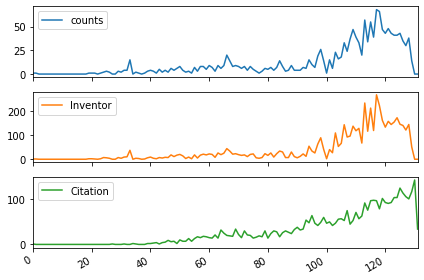

In [17]:
Qd.plot(subplots=True)
plt.tight_layout()
plt.show()

In [20]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# frame as supervised learning
reframed = series_to_supervised(Qd.values, 4)
# drop columns we don't want to predict
reframed = reframed.drop(reframed.columns[[-1,-2]], axis=1)
reframed


,var1(t-4),var2(t-4),var3(t-4),var1(t-3),var2(t-3),var3(t-3),var1(t-2),var2(t-2),var3(t-2),var1(t-1),var2(t-1),var3(t-1),var1(t)
4,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,41.0,154.0,104.0,41.0,172.0,104.0,43.0,145.0,125.0,35.0,140.0,114.0,30.0
128,41.0,172.0,104.0,43.0,145.0,125.0,35.0,140.0,114.0,30.0,121.0,106.0,38.0
129,43.0,145.0,125.0,35.0,140.0,114.0,30.0,121.0,106.0,38.0,144.0,101.0,14.0
130,35.0,140.0,114.0,30.0,121.0,106.0,38.0,144.0,101.0,14.0,51.0,117.0,0.0


In [21]:
# split training and test and normalize the data
train= reframed[12:120].values
test = reframed[120:128].values
#normalize the data
scaler = MinMaxScaler(feature_range = (0, 1))
train = scaler.fit_transform(train)
test = scaler.transform(test)
features = train[:,:-1]
labels = train[:,-1]
features_test = test[:,:-1]
labels_test = test[:,-1]
features_set = np.reshape(features,(features.shape[0], 4, 3))
features_test_set = np.reshape(features_test,(features_test.shape[0], 4, 3))

In [ ]:
#train= reframed[12:120].values
#test = reframed[120:128].values

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [26]:
model = Sequential()
model.add(LSTM(units= 40, return_sequences=True, input_shape=(4,3)))
model.add(Dropout(0.2))
model.add(LSTM(units=40, return_sequences = True))
model.add(Dropout(0.2))
#model.add(LSTM(units=50, return_sequences=True))
#model.add(Dropout(0.2))
model.add(Flatten())
#model.add(LSTM(units=50))
#model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Train on 75 samples, validate on 33 samples
Epoch 1/100
75/75 [==============================] - 0s 306us/step - loss: 0.0014 - val_loss: 0.0989
Epoch 2/100
75/75 [==============================] - 0s 279us/step - loss: 0.0013 - val_loss: 0.0849
Epoch 3/100
75/75 [==============================] - 0s 279us/step - loss: 0.0014 - val_loss: 0.0852
Epoch 4/100
75/75 [==============================] - 0s 266us/step - loss: 0.0015 - val_loss: 0.1041
Epoch 5/100
75/75 [==============================] - 0s 279us/step - loss: 0.0015 - val_loss: 0.1144
Epoch 6/100
75/75 [==============================] - 0s 266us/step - loss: 0.0015 - val_loss: 0.1150
Epoch 7/100
75/75 [==============================] - 0s 253us/step - loss: 0.0014 - val_loss: 0.0960
Epoch 8/100
75/75 [==============================] - 0s 266us/step - loss: 0.0016 - val_loss: 0.0861
Epoch 9/100
75/75 [==============================] - 0s 253us/step - loss: 0.0014 - val_loss: 0.1178
Epoch 10/100
75/75 [===========================

Epoch 81/100
75/75 [==============================] - 0s 346us/step - loss: 0.0014 - val_loss: 0.0703
Epoch 82/100
75/75 [==============================] - 0s 293us/step - loss: 0.0015 - val_loss: 0.0586
Epoch 83/100
75/75 [==============================] - 0s 266us/step - loss: 0.0014 - val_loss: 0.0546
Epoch 84/100
75/75 [==============================] - 0s 279us/step - loss: 0.0014 - val_loss: 0.0616
Epoch 85/100
75/75 [==============================] - 0s 306us/step - loss: 0.0015 - val_loss: 0.0731
Epoch 86/100
75/75 [==============================] - 0s 306us/step - loss: 0.0014 - val_loss: 0.0655
Epoch 87/100
75/75 [==============================] - 0s 359us/step - loss: 0.0015 - val_loss: 0.0604
Epoch 88/100
75/75 [==============================] - 0s 306us/step - loss: 0.0013 - val_loss: 0.0569
Epoch 89/100
75/75 [==============================] - 0s 372us/step - loss: 0.0015 - val_loss: 0.0624
Epoch 90/100
75/75 [==============================] - 0s 346us/step - loss: 0.0014

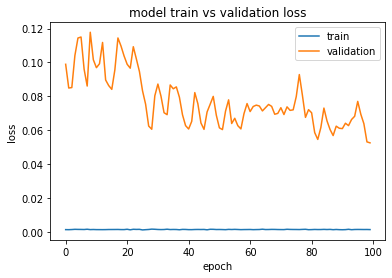

In [39]:
history=model.fit(features_set, labels, epochs = 100, batch_size = 20, validation_split = 0.3)
# plot history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

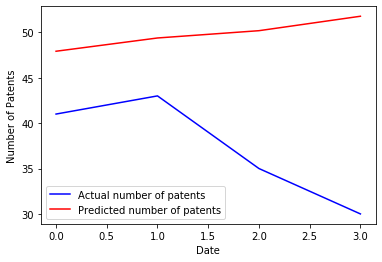

In [247]:
predictions = model.predict(features_test_set)
pred_mt = np.concatenate((features_test, predictions), axis = 1)
predictions = scaler.inverse_transform(pred_mt)
predictions = predictions[:,-1]
plt.plot(reframed[120:124].values[:,-1], color='blue', label='Actual number of patents')
plt.plot(predictions , color='red', label='Predicted number of patents')
plt.xlabel('Date')
plt.ylabel('Number of Patents')
plt.legend()
plt.show()

In [248]:
y_true = reframed[120:124].values[:,-1]

In [249]:
predictions

array([47.91961169, 49.38009119, 50.18334985, 51.7744329 ])

In [250]:
mse = mean_squared_error(y_true, predictions)
mse

198.31165754554968